In [1]:
#Fifa'19 Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display,HTML
import os

In [2]:
data = pd.read_csv("/Users/yashpasar/Desktop/data.csv")
data

IOError: File /Users/yashpasar/Desktop/data.csv does not exist

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [12]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Text(0.5,1,'Heatmap of dataset')

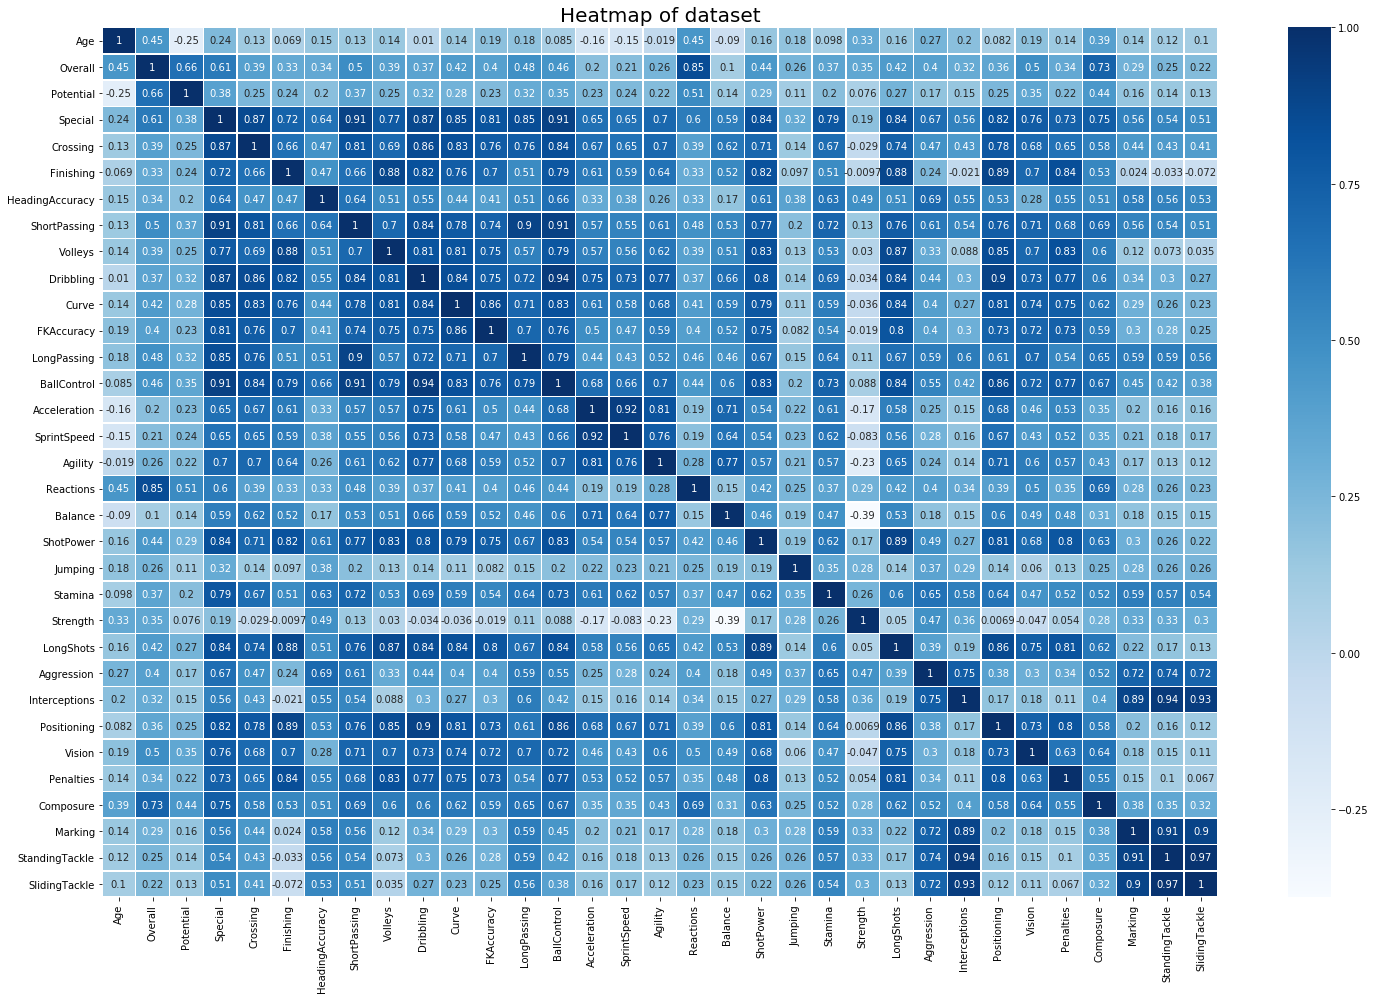

In [23]:
#Determining important features
plt.rcParams['figure.figsize']=(25,16)
hm=sb.heatmap(data[['Age', 'Overall', 'Potential', 'Special', 'Body Type', 'Position','Height', 'Weight', 'Crossing',
    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling','Curve', 'FKAccuracy', 'LongPassing',
    'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower','Jumping', 'Stamina', 
    'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
    'Marking', 'StandingTackle', 'SlidingTackle']].corr(), annot = True , linewidths= 0.5, cmap='Blues')

hm.set_title(label='Heatmap of dataset', fontsize=20)

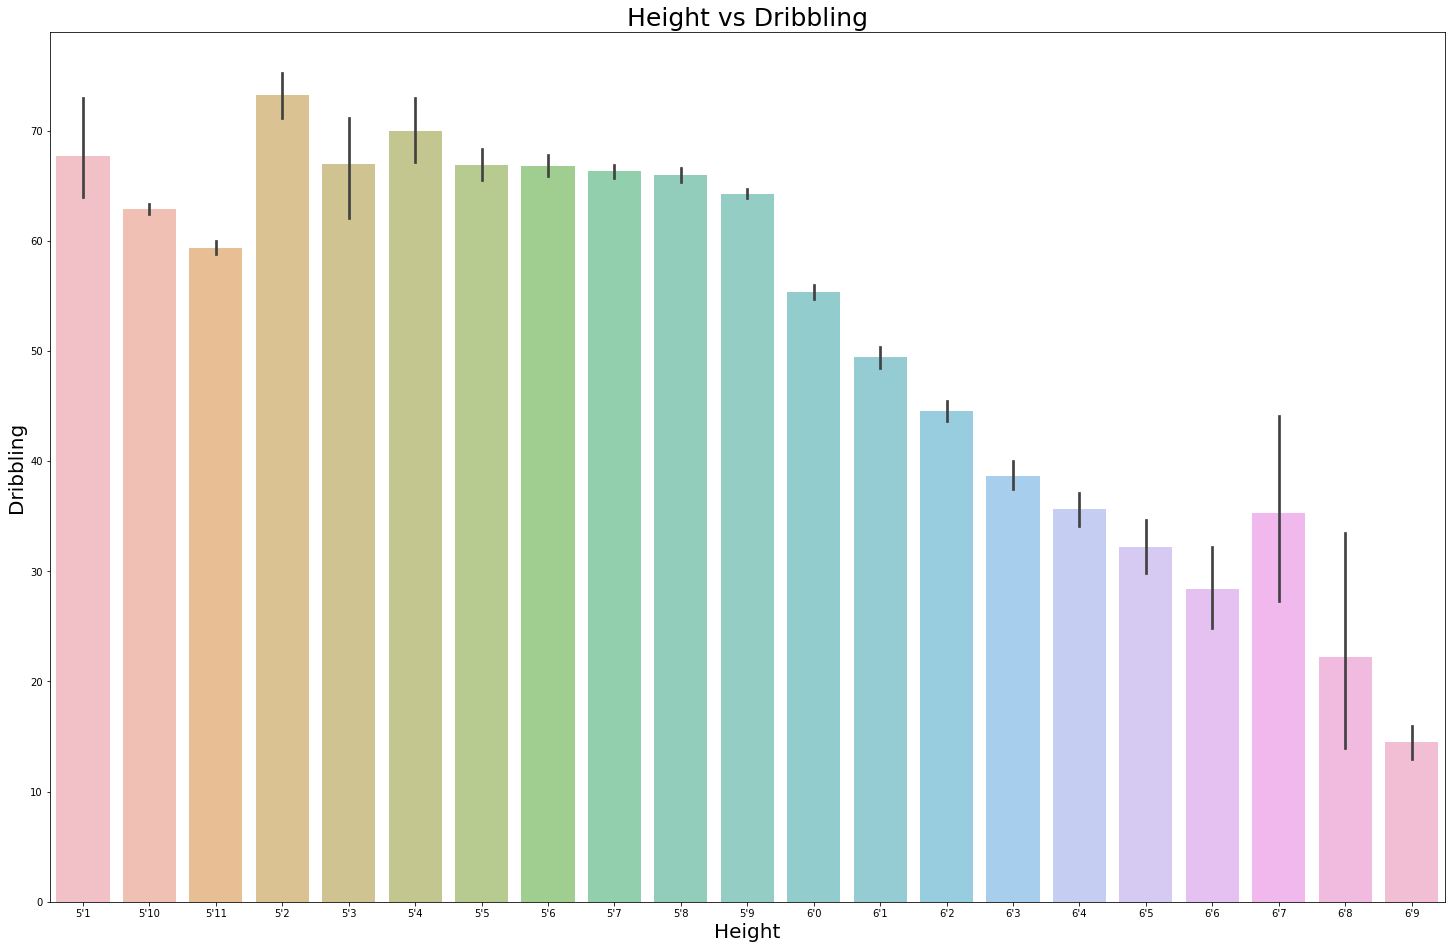

In [47]:
#Height vs dribbling skills
plt.xlabel('Height', fontsize = 20)
plt.ylabel('Dribbling', fontsize = 20)
plt.title('Height vs Dribbling', fontsize = 25)
sb.barplot(x='Height', y='Dribbling', data= data.sort_values('Height', inplace = False), alpha=0.6)

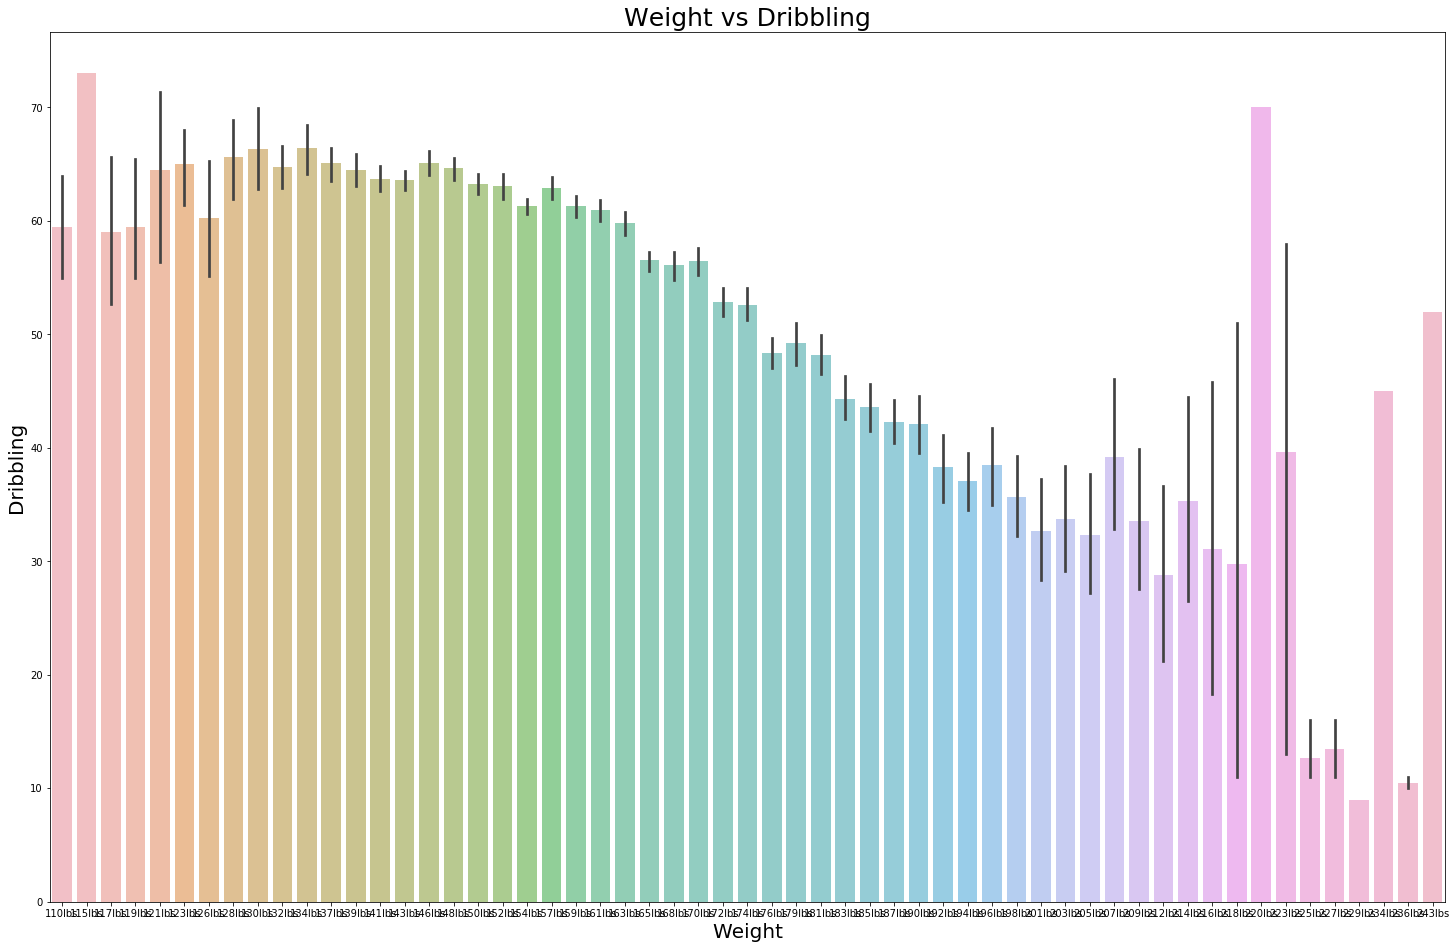

In [50]:
#Weight vs dribbling skills
plt.xlabel('Weight', fontsize=20)
plt.ylabel('Dribbling', fontsize=20)
plt.title('Weight vs Dribbling', fontsize = 25)
sb.barplot(x='Weight', y='Dribbling', data= data.sort_values('Weight'), alpha = 0.6)

In [ ]:
#L. Messi Vs Cristiano Ronaldo
#Time to figure out who's better at what.

In [52]:
skills = ['Overall', 'Potential', 'Crossing',
   'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
   'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
   'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
   'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
   'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
   'Marking', 'StandingTackle', 'SlidingTackle']

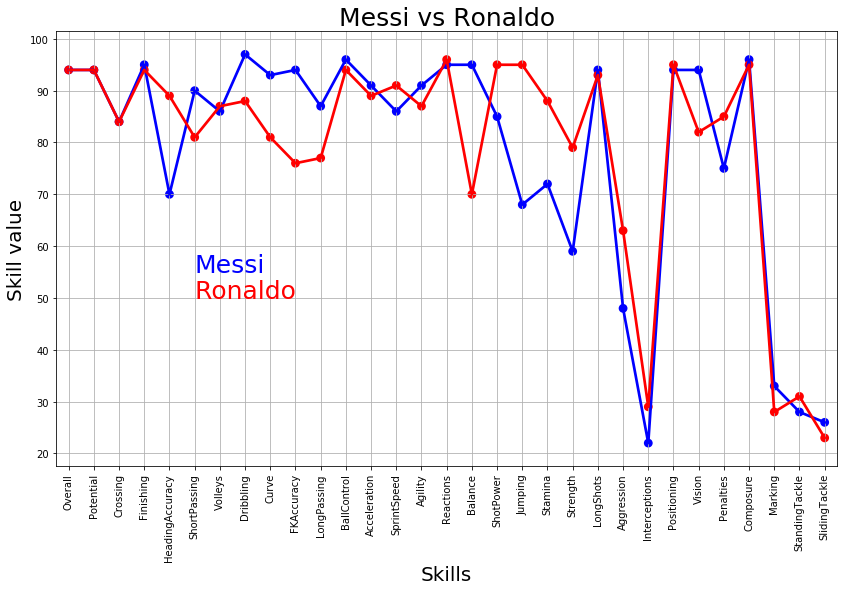

In [54]:
messi = data.loc[data['Name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
ronaldo = data.loc[data['Name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)

plt.figure(figsize=(14,8))
sb.pointplot(data=messi,color='blue',alpha=0.6)
sb.pointplot(data=ronaldo, color='red', alpha=0.6)
plt.text(5,55,'Messi',color='blue',fontsize = 25)
plt.text(5,50,'Ronaldo',color='red',fontsize = 25)
plt.xticks(rotation=90)
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Messi vs Ronaldo', fontsize = 25)
plt.grid()

In [57]:
#Top 10 Players based on Overall skills
print(data.sort_values('Overall', ascending=False)[['Name', 'Overall']][:10])

                 Name  Overall
0            L. Messi       94
1   Cristiano Ronaldo       94
2           Neymar Jr       92
5           E. Hazard       91
7           L. Suárez       91
8        Sergio Ramos       91
4        K. De Bruyne       91
6           L. Modrić       91
3              De Gea       91
11           T. Kroos       90


In [89]:
#Top 5 clubs with overall best player
print(data.groupby(['Club'])['Overall'].max().sort_values(ascending = False)[:5])

Club
Juventus               94
FC Barcelona           94
Paris Saint-Germain    92
Manchester City        91
Chelsea                91
Name: Overall, dtype: int64


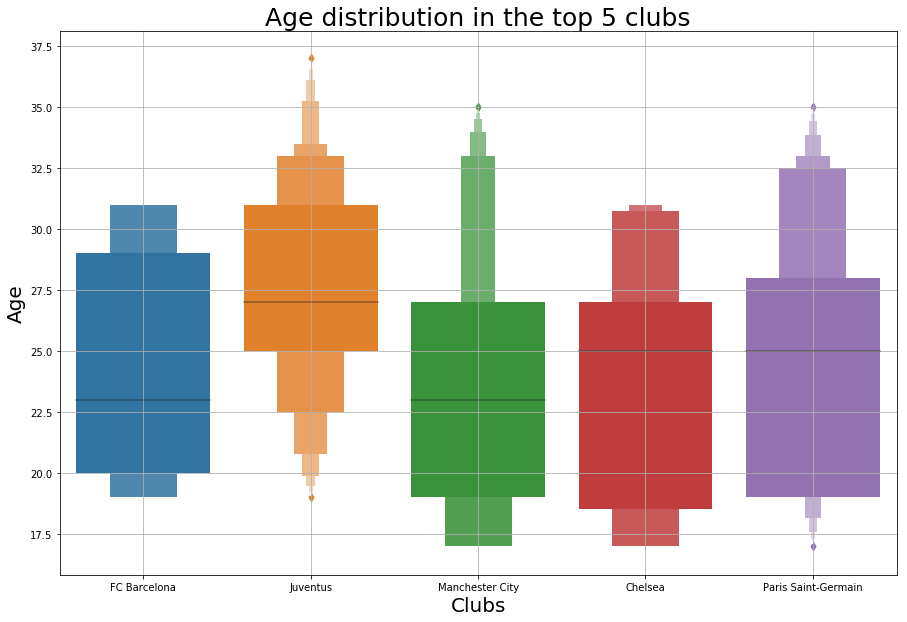

In [96]:
#Age distribution of players in the clubs
top_club_names = ('FC Barcelona', 'Juventus', 'Paris Saint-Germain', 'Chelsea', 'Manchester City')
clubs = data.loc[data['Club'].isin(top_club_names) & data['Age']]
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sb.boxenplot(x="Club", y="Age", data=clubs)
ax.set_title(label='Age distribution in the top 5 clubs', fontsize=25)
plt.xlabel('Clubs', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.grid()

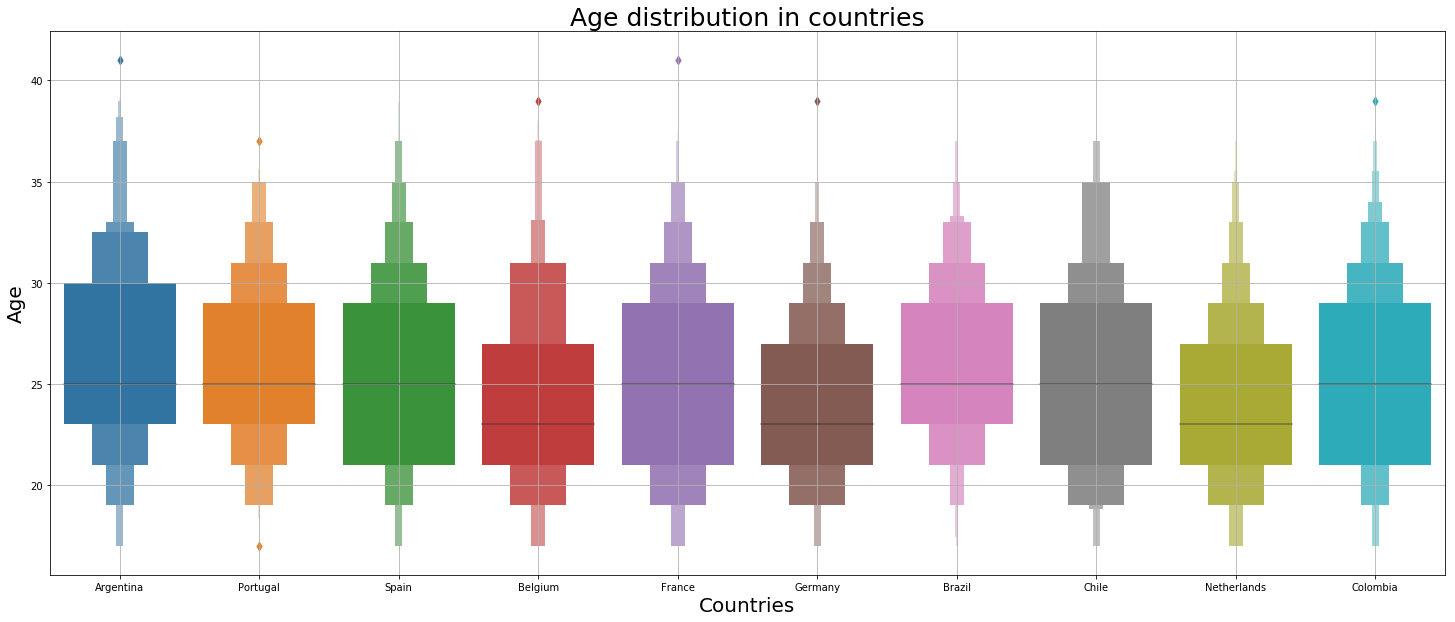

In [100]:
#Age distribution of players in countries
countries_names = ('France', 'Brazil', 'Germany', 'Belgium', 'Spain', 'Netherlands', 'Argentina', 'Portugal', 'Chile', 'Colombia')
countries = data.loc[data['Nationality'].isin(countries_names) & data['Age']]
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
ax = sb.boxenplot(x="Nationality", y="Age", data=countries)
ax.set_title(label='Age distribution in countries', fontsize=25)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.grid()